In [1]:
import numpy as np
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakShapedNet
from nodes.layer import ShapedLayer

import random
import matplotlib.pyplot as plt

random.seed(42)

inputlayer = ShapedLayer((8,8))
foldiaklayer = ShapedLayer(16)

foldiaklayer.fillnodes(FoldiakNode)
inputlayer.fillnodes(InputNode)
    
network = FoldiakShapedNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_foldiak(inputlayer, foldiaklayer)

network.setparam("intmethod","LSODA")
network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)
network.setparam("p",1.0/8)
network.setparam("l",10)
network.setparam("tmax",100)

In [2]:
network.setup()
network.setup()

In [3]:
samples = np.loadtxt("../data/lines_keyed.csv")
keys = np.loadtxt("../data/lines_keys.csv")

In [4]:
print(samples.shape)
print(keys.shape)

(100000, 64)
(100000, 16)


In [5]:
train = samples[25000:]

In [6]:
#Steady state thres:
network.setparam("a",0.0)
network.setparam("b",0.0)
network.setparam("y",0.5)
for i in range(200):
    for i in inputlayer.nodes:
        i.setvalstored(random.uniform(0,1))
    network.update()

In [7]:
network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)


maxnum = train.shape[0]

for i in range(train.shape[0]):
    inputlayer.setvals(train[i,:])
    network.update()
    if (i%1000)==999:
        print(str(i+1)+"/"+str(maxnum))

1000/75000
2000/75000
3000/75000
4000/75000
5000/75000
6000/75000
7000/75000
8000/75000
9000/75000
10000/75000
11000/75000
12000/75000
13000/75000
14000/75000
15000/75000
16000/75000
17000/75000
18000/75000
19000/75000
20000/75000
21000/75000
22000/75000
23000/75000
24000/75000
25000/75000
26000/75000
27000/75000
28000/75000
29000/75000
30000/75000
31000/75000
32000/75000
33000/75000
34000/75000
35000/75000
36000/75000
37000/75000
38000/75000
39000/75000
40000/75000
41000/75000
42000/75000
43000/75000
44000/75000
45000/75000
46000/75000
47000/75000
48000/75000
49000/75000
50000/75000
51000/75000
52000/75000
53000/75000
54000/75000
55000/75000
56000/75000
57000/75000
58000/75000
59000/75000
60000/75000
61000/75000
62000/75000
63000/75000
64000/75000
65000/75000
66000/75000
67000/75000
68000/75000
69000/75000
70000/75000
71000/75000
72000/75000
73000/75000
74000/75000
75000/75000


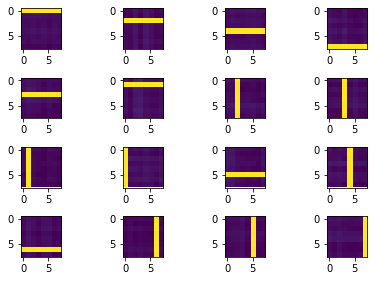

In [20]:
fig=plt.figure()

for node_num in range(len(foldiaklayer.nodes)):
    testbias = []
    connects = np.reshape(network.cgroups[0].npconnects, -1)
    for node in inputlayer.nodes:
        for i in connects:
            if (i.input is node) and (i.output is foldiaklayer.nodes[node_num]):
                testbias.append(i.bias)
    fig.add_subplot(4,4,node_num+1)
            
    plt.imshow(np.array(testbias).reshape((8,8)))
fig.tight_layout()
#plt.savefig("2020_07_07_bias_figure.png")
plt.show()

In [11]:
permutation = [0, 5, 1, 4, 2, 10, 12, 3,
               9, 8, 6, 7, 11, 14, 13, 15]
idx = np.empty_like(permutation)
idx[permutation] = np.arange(len(permutation))

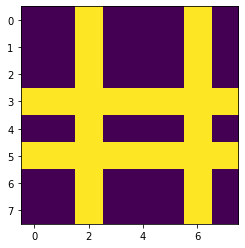

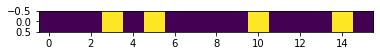

In [12]:
plt.imshow(np.reshape(samples[1,:], (8,8)))
plt.show()
plt.imshow(np.reshape(keys[1,:], (1,16)))
plt.show()

In [13]:
test_samples = samples[:25000]
test_keys = keys[:25000, idx]

In [14]:
output_keys = np.zeros((25000,16))

for i in range(test_samples.shape[0]):
    inputlayer.setvals(test_samples[i,:])
    network.update()
    output_keys[i,:] = foldiaklayer.returnvals()
    if (i%1000)==999:
        print(str(i+1)+"/"+str(25000))

1000/75000
2000/75000
3000/75000
4000/75000
5000/75000
6000/75000
7000/75000
8000/75000
9000/75000
10000/75000
11000/75000
12000/75000
13000/75000
14000/75000
15000/75000
16000/75000
17000/75000
18000/75000
19000/75000
20000/75000
21000/75000
22000/75000
23000/75000
24000/75000
25000/75000


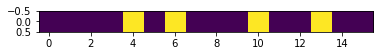

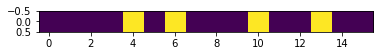

In [15]:
plt.imshow(np.reshape(test_keys[1,:], (1,16)))
plt.show()
plt.imshow(np.reshape(output_keys[1,:], (1,16)))
plt.show()

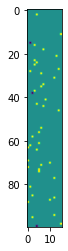

In [19]:
plt.imshow((test_keys-output_keys)[:100,:])

In [21]:
1 - (np.sum(np.abs(test_keys-output_keys))/np.sum(test_keys))

0.7694198525150383

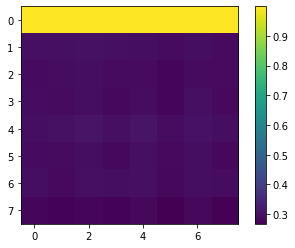

In [31]:
plt.imshow(np.reshape(network.cgroups[0].getbiases()[:,0],(8,8)))
plt.colorbar()
plt.show()

In [25]:
network.cgroups[0].npconnects.shape

(64, 16)

In [32]:
possibletypes = []
for i in range(8):
    sample = np.zeros((8,8))
    sample[:,i] = 1
    possibletypes.append(sample)
for i in range(8):
    sample = np.zeros((8,8))
    sample[i,:] = 1
    possibletypes.append(sample)

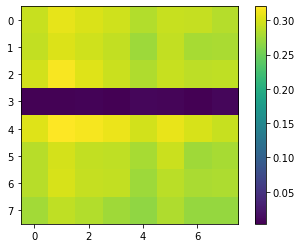

In [67]:
outimages = []
for j in range(16):
    lowestmin = 64
    outimage = np.zeros((8,8))
    for i in possibletypes:
        mem = np.reshape(network.cgroups[0].getbiases()[:,j],(8,8))
        er = np.sum(np.abs(mem - i))
        #print(er)
        if (er < lowestmin):
            lowestmin = er
            outimage = np.abs(mem-i)
    outimages.append(outimage)
plt.imshow(outimages[4])
plt.colorbar()
plt.show()

TypeError: colorbar() missing 1 required positional argument: 'mappable'

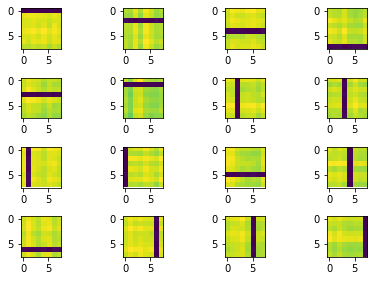

In [71]:
fig=plt.figure()

for node_num in range(len(foldiaklayer.nodes)):
    fig.add_subplot(4,4,node_num+1)
            
    plt.imshow(outimages[node_num])
fig.tight_layout()
#plt.savefig("2020_07_07_bias_figure.png")
fig.colorbar()
plt.show()

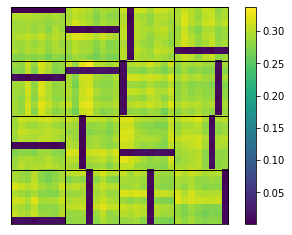

In [124]:
outimg = np.zeros((4*8,4*8))
for i in range(4):
    for j in range(4):
        outimg[i*8:i*8+8,j*8:j*8+8] = outimages[i+(4*j)]
plt.figure().patch.set_facecolor('white')
plt.imshow(outimg)
plt.colorbar()
plt.yticks([i*8-0.5 for i in range(4)], ["" for i in range(4)])
plt.xticks([i*8-0.5 for i in range(4)], ["" for i in range(4)])
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.grid(b=True, color='black', linestyle='-', linewidth=1, fillstyle='none')
plt.savefig("2020_07_07_keys_error.png", dpi=200)
plt.show()

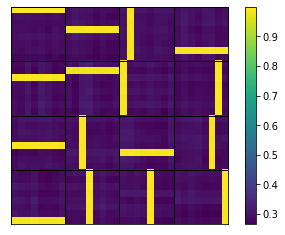

In [123]:
outimg = np.zeros((4*8,4*8))
for i in range(4):
    for j in range(4):
        outimg[i*8:i*8+8,j*8:j*8+8] = np.reshape(network.cgroups[0].getbiases()[:,i+j*4], (8,8))
plt.figure().patch.set_facecolor('white')
plt.imshow(outimg)
plt.colorbar()
plt.yticks([i*8-0.5 for i in range(4)], ["" for i in range(4)])
plt.xticks([i*8-0.5 for i in range(4)], ["" for i in range(4)])
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.grid(b=True, color='black', linestyle='-', linewidth=1, fillstyle='none')
plt.savefig("2020_07_07_keys_biases.png", dpi=200)
plt.show()

In [129]:
print("Average error in memories:")
ersum = 0
for i in outimages:
    ersum += np.sum(i)
print(ersum/(8*8*16))
print("Average error in predictions:")
print(np.sum(np.abs(test_keys-output_keys))/np.sum(test_keys))

Average error in memories:
0.2578048938426633
Average error in predictions:
0.23058014748496172
